# Logistic Regression

## Data Preparation

In [4]:
#import the required libraries
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd


#Loading the dataset 
dataset = pd.read_csv('carPurchase.csv')

# Creating X and y
X = dataset.iloc[:, [2,3] ].values   # Store all the raws, Store columns 2 and 3
y = dataset.iloc[:,4].values    # Store all the raws,  Store colum 4 


# Splitting the data into Training Set and Test Set
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3) #Test size = 30%, training size = 70%


#Normalizing the features
from sklearn.preprocessing import StandardScaler 
sc_X = StandardScaler() 
X_train = sc_X.fit_transform(X_train) 
X_test = sc_X.transform(X_test)

## Building a model
### Fit Logistic Regression model to the training set

In [10]:
#Fitting Logistic Regression to Training Set
from sklearn.linear_model import LogisticRegression

classifierObj = LogisticRegression(random_state=0)
classifierObj.fit(X_train, y_train)

#Making predictions on the Test Set
y_pred = classifierObj.predict(X_test)

#Print Model Accuracy
print(classifierObj.score(X_test,y_test))

0.8333333333333334


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [9]:
print (y_test)
print ()
print (y_pred)

[1 0 1 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 0 0 1
 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 0 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0
 0 0 0 1 1 1 0 0 1]

[0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 1 0 0 0 1 0
 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 1 0 0 1
 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1
 0 0 0 1 0 1 0 0 0]


## Evaluating the predictions
### Constructing a Confusion Matrix

In [11]:
#Evaluating the predictions using a Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[69  9]
 [11 31]]


## Visualization

### Visualizing the Training set results

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


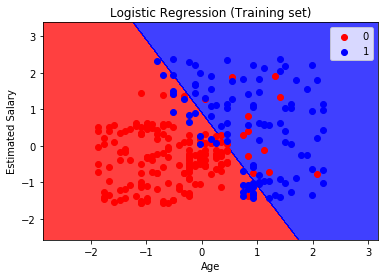

In [14]:
# Visualizing the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
    np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifierObj.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
    alpha = 0.75, cmap = ListedColormap(('red', 'blue')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
       c = ListedColormap(('red', 'blue'))(i), label = j)

plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()

plt.show()

### Visualizing the Test set results

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


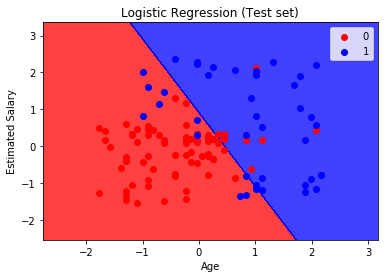

In [15]:
# Visualizing the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
    np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifierObj.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
    alpha = 0.75, cmap = ListedColormap(('red', 'blue')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
        c = ListedColormap(('red', 'blue'))(i), label = j)

plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()

plt.show()